## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [39]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0 	
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [40]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Training'
valid_path = 'Testing'


In [41]:

resnet = EfficientNetB0(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




16711680/16705208 [==============================] - 2s 0us/step


In [42]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [43]:
  # useful for getting number of output classes
folders = glob('Training/*')

In [44]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [45]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [46]:

# view the structure of the model
model.summary()


Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_______________________________________________________________________________________

In [47]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [48]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [49]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2870 images belonging to 4 classes.


(50, 224, 224, 3)
[0 1 3 3 1 1 1 0 1 1 2 2 3 1 1 3 0 1 2 2 3 0 2 0 2 1 3 2 2 0 1 1 3 1 1 0 3
 0 3 3 0 3 2 2 1 3 1 3 2 0]


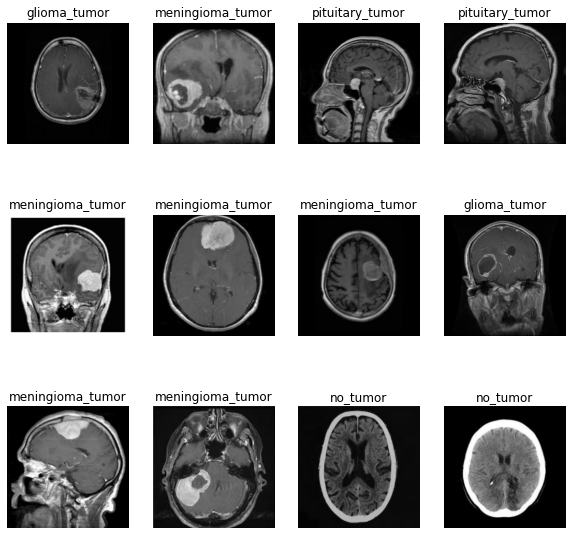

In [50]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [51]:
test_set = test_datagen.flow_from_directory('Testing',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 394 images belonging to 4 classes.


In [52]:
dataset=tf.keras.preprocessing.image_dataset_from_directory ("Testing",
                                            shuffle=True,
                                           image_size=(IMAGE_SIZE),
                                           batch_size=50
                                           )

Found 394 files belonging to 4 classes.


(50, 224, 224, 3)
[1 3 1 0 0 0 2 1 3 1 3 3 3 1 1 1 0 0 2 1 0 0 1 2 2 0 3 2 1 3 1 3 2 3 0 3 1
 0 2 3 0 3 2 1 0 0 1 2 1 0]


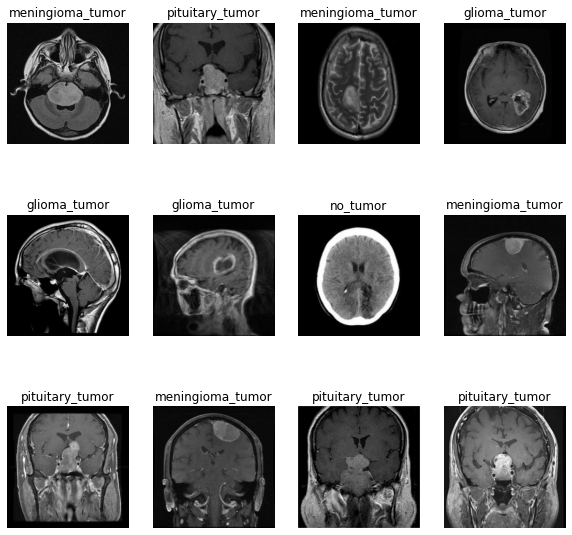

In [53]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [54]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=17,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/17
90/90 [==============================] - 180s 2s/step - loss: 3.4822 - accuracy: 0.2721 - val_loss: 2.2117 - val_accuracy: 0.2665
Epoch 2/17
90/90 [==============================] - 203s 2s/step - loss: 1.9435 - accuracy: 0.2606 - val_loss: 1.5989 - val_accuracy: 0.2919
Epoch 3/17
90/90 [==============================] - 201s 2s/step - loss: 2.0913 - accuracy: 0.2679 - val_loss: 3.0632 - val_accuracy: 0.1878
Epoch 4/17
90/90 [==============================] - 272s 3s/step - loss: 2.1626 - accuracy: 0.2746 - val_loss: 1.7979 - val_accuracy: 0.2919
Epoch 5/17
90/90 [==============================] - 209s 2s/step - loss: 1.9883 - accuracy: 0.2840 - val_loss: 1.9176 - val_accuracy: 0.2919
Epoch 6/17
90/90 [==============================] - 215s 2s/step - loss: 2.0463 - accuracy: 0.2676 - val_loss: 4.3350 - val_accuracy: 0.1878
Epoch 7/17
90/90 [==============================] - 201s 2s/step - loss: 2.3255 - accuracy: 0.2519 - val_loss: 1.7567 - val_accuracy: 0.2563
Epoch 8/17
90

In [55]:
import matplotlib.pyplot as plt

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.title("For Inception V3")
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("For Inception V3")
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [20]:

y_pred = model.predict(test_set)


In [21]:
y_pred

array([[3.5957647e-11, 1.0000000e+00, 2.7767599e-10, 3.3508286e-11],
       [9.2597065e-25, 1.5049957e-16, 3.4335380e-26, 1.0000000e+00],
       [1.7842797e-28, 7.1862465e-28, 1.0000000e+00, 1.0800247e-31],
       ...,
       [0.0000000e+00, 2.7429179e-29, 9.9999013e-13, 1.0000000e+00],
       [1.1579806e-25, 1.8651537e-32, 1.0000000e+00, 1.5872062e-37],
       [2.0209490e-23, 1.0703501e-22, 1.0000000e+00, 2.3072503e-36]],
      dtype=float32)

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([1, 3, 2, 2, 1, 2, 1, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 2,
       2, 1, 2, 2, 1, 1, 3, 0, 2, 0, 1, 2, 3, 2, 1, 2, 1, 3, 2, 1, 2, 0,
       2, 1, 1, 2, 2, 3, 1, 2, 0, 2, 0, 3, 2, 2, 2, 1, 1, 2, 2, 1, 1, 3,
       1, 1, 1, 3, 1, 2, 2, 0, 1, 2, 2, 2, 1, 3, 2, 1, 2, 2, 1, 0, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 3, 2, 3, 2, 0, 1, 3, 3, 2, 2, 3, 3, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 3, 0, 1, 2, 3, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1,
       1, 3, 3, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 3, 2, 1, 1, 1, 1, 1,
       3, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 3, 2, 3, 1, 1, 1, 2, 2, 3, 1, 2,
       1, 2, 3, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 2, 2, 2, 2, 0, 1, 3, 2, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 3,
       2, 2, 3, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 3, 1, 3, 2, 2, 2,
       2, 1, 1, 2, 1, 3, 2, 2, 1, 3, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 1, 2, 1, 2, 2, 3, 2, 1, 0, 1, 0, 2, 2,

In [30]:
import tensorflow as tf
from tensorflow.keras import models, layers

In [31]:
dataset=tf.keras.preprocessing.image_dataset_from_directory ("Training",
                                            shuffle=True,
                                           image_size=(IMAGE_SIZE),
                                           batch_size=50
                                           )

Found 2870 files belonging to 4 classes.


In [32]:
class_names= dataset.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']